# Licence plates Image Classification Portolio

In this project we will build a deep learning model to classify licence plates from 56 different USA regions. There are almost 10K color images in size (128,224) separated into train, test and validation sets.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import tensorflow as tf
from tensorflow.keras import utils,Sequential,layers
from keras.layers import Activation, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Data exploration

Let's take a look how does randomly selected images look like.

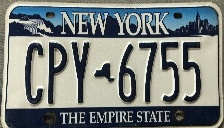

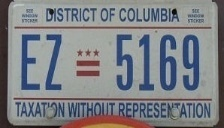

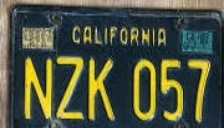

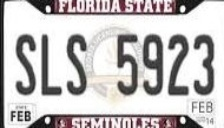

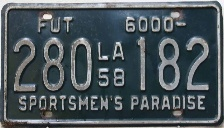

In [38]:
img = Image.open("new plates/train/NEW YORK/001.jpg")
img2 = Image.open("new plates/train/WASHINGTON DC/001.jpg")
img3 = Image.open("new plates/train/CALIFORNIA/004.jpg")
img4 = Image.open("new plates/train/FLORIDA/001.jpg")
img5 = Image.open("new plates/train/LOUISIANA/001.jpg")
display(img,img2,img3,img4,img5)

As you can see images are in good quality, they are readable and plates are fulfilling almost entire image. Thanks to this we don't need to do much preprocessing.

## Data loading

Let's load images into 3 different sets.

In [27]:
train = tf.keras.preprocessing.image_dataset_from_directory('new plates/train', label_mode = 'categorical', color_mode='rgb',image_size=(128, 128),batch_size=32)

Found 8161 files belonging to 56 classes.


In [28]:
test = tf.keras.preprocessing.image_dataset_from_directory('new plates/test',label_mode='categorical',color_mode = 'rgb',image_size=(128, 128),batch_size=32)

Found 280 files belonging to 56 classes.


In [29]:
valid = tf.keras.preprocessing.image_dataset_from_directory('new plates/valid',label_mode='categorical',color_mode = 'rgb',image_size=(128, 128),batch_size=32)

Found 280 files belonging to 56 classes.


The majority of images are in the training set. Remaining ones are located in train and test set to validate model accuracy and prevent data leak.

One thing we will do is scaling our images on scale 0-1.

In [30]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train = train.map(process)
test = test.map(process)
valid = valid.map(process)

## Model building

To complete this project we will use CNN networks. One of the addidional features we will implement are Pooling and Dropout. The second one is especially important in the fight against overfitting.

In [32]:
model = Sequential()

model.add(tf.keras.Input(shape=(128, 128, 3)))

model.add(tf.keras.layers.Conv2D(64, 5, activation="relu"))

model.add(tf.keras.layers.AveragePooling2D())

model.add(Dropout(0.25))

model.add(tf.keras.layers.Conv2D(64, 4, activation="relu"))

model.add(tf.keras.layers.AveragePooling2D())

model.add(tf.keras.layers.Conv2D(32, 3, activation="relu"))

model.add(tf.keras.layers.AveragePooling2D())

model.add(Dropout(0.25))

model.add(tf.keras.layers.Conv2D(16, 2, activation="relu"))

model.add(tf.keras.layers.AveragePooling2D())

model.add(Flatten())

model.add(Dense(56, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 124, 124, 64)      4864      
                                                                 
 average_pooling2d_23 (Aver  (None, 62, 62, 64)        0         
 agePooling2D)                                                   
                                                                 
 dropout_17 (Dropout)        (None, 62, 62, 64)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 59, 59, 64)        65600     
                                                                 
 average_pooling2d_24 (Aver  (None, 29, 29, 64)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 27, 27, 32)       

Our loss function is categorical cross entropy. To measure model score we will use accuracy. In addition we will implement EarlyStopping function to stop the learning process if there will be no gain on validation set loss.

## Model training

In [34]:
history = model.fit(train, validation_data = valid, epochs=30, callbacks = [es])

Epoch 1/30
256/256 [==============================] - 529s 2s/step - loss: 3.9836 - accuracy: 0.0326 - val_loss: 3.8664 - val_accuracy: 0.0750
Epoch 2/30
256/256 [==============================] - 519s 2s/step - loss: 3.4136 - accuracy: 0.2076 - val_loss: 3.0722 - val_accuracy: 0.3179
Epoch 3/30
256/256 [==============================] - 536s 2s/step - loss: 2.7325 - accuracy: 0.3621 - val_loss: 2.6743 - val_accuracy: 0.4000
Epoch 4/30
256/256 [==============================] - 523s 2s/step - loss: 2.3490 - accuracy: 0.4466 - val_loss: 2.3930 - val_accuracy: 0.4286
Epoch 5/30
256/256 [==============================] - 523s 2s/step - loss: 2.0923 - accuracy: 0.4982 - val_loss: 2.2716 - val_accuracy: 0.4964
Epoch 6/30
256/256 [==============================] - 537s 2s/step - loss: 1.8984 - accuracy: 0.5465 - val_loss: 2.1425 - val_accuracy: 0.5107
Epoch 7/30
256/256 [==============================] - 524s 2s/step - loss: 1.7267 - accuracy: 0.5801 - val_loss: 2.0321 - val_accuracy: 0.5250

Let's see how the learning process went on plots.

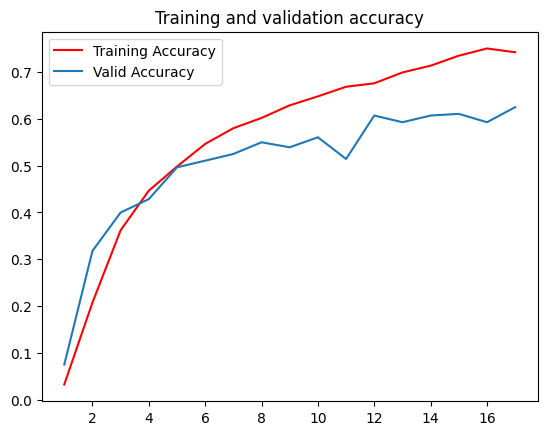

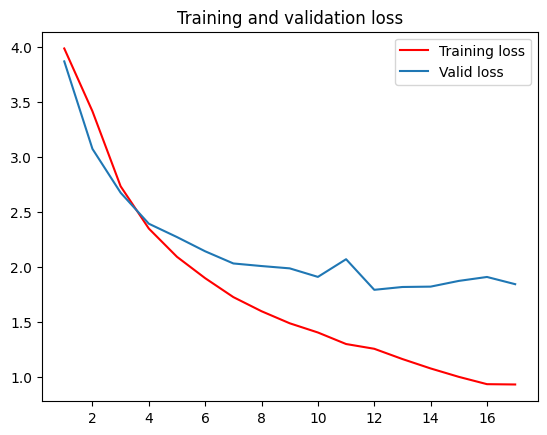

In [43]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy,label="Training Accuracy", color="red")
plt.plot(epochs, val_accuracy,label="Valid Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss,label="Training loss", color="red")
plt.plot(epochs, val_loss, label="Valid loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

We have received accuracy around 60 percent. As you can see over the time training loss has been better reduced comparing to valid loss. One of the reason might be too low dropout level or lack of other overfitting prevent methods.

## Test test

It's time to eventually use our test set - best measurement of our model score.

In [36]:
model.evaluate(test)

9/9 [==============================] - 4s 433ms/step - loss: 1.8747 - accuracy: 0.6143


[1.8747321367263794, 0.6142857074737549]

Accuracy here is pretty similar to this received on valid set. That's a good sight.

## Summary

Although we have done a lot of great job there's a possibility of achieving even better accuracy. I haven't decided to experiment more on tuning model because learning process takes much time. One of the tips might be adding more layers and other overfitting prevent methods.

In the end we will save our trained model.

In [44]:
model.save("Licence_plate_CNN", save_format = "tf")